# 估计进阶

## 欧元问题
> 当以边缘转动比利时一欧元硬币250次后，得到的结果是正面140次反面110次。  
> “这看起来很可疑”，伦敦经济学院的统计讲师巴里布莱特说，“如果硬币是均匀  
> 的，得到这个结果的可能性低于7%。”

In [18]:
from thinkbayes import Suite
class Euro(Suite):
    def Likelihood(self, data, hypo):
        x = hypo
        if data == "H":
            return x / 100.0
        else:
            return 1 - x/100.0
        
suite = Euro(xrange(0, 101))
dataset = 'H'*140 + 'T'*110
for data in dataset:
    suite.Update(data)

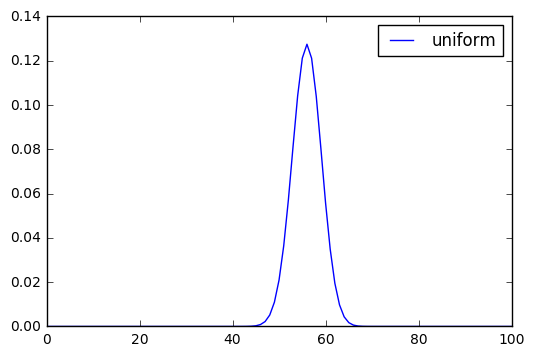

In [19]:
x = [item[0] for item in suite.Items()]
prob = [item[1] for item in suite.Items()]
import matplotlib.pyplot as plt
plt.plot(x, prob, label="uniform")
plt.legend()
plt.show()

In [25]:
from thinkbayes import Percentile, CredibleInterval
print("MaximumLikelihood", suite.MaximumLikelihood())
print("Mean", suite.Mean())
print("Median", Percentile(suite, 50))
print("CredibleInterval", CredibleInterval(suite, 90))

('MaximumLikelihood', 56)
('Mean', 55.952380952380956)
('Median', 56)
('CredibleInterval', (51, 61))


## 先验概率的湮没
如果有足够的数据，即使在先验分布上持有不同观点，人们也会得到趋于收敛的后验概率。

In [29]:
# 三角形状的先验概率
suite = Euro()
for x in xrange(0, 51):
    suite.Set(x, x)
for x in xrange(51, 101):
    suite.Set(x, 100-x)
suite.Normalize()
dataset = 'H'*140 + 'T'*110
for data in dataset:
    suite.Update(data)
print("MaximumLikelihood", suite.MaximumLikelihood())
# 只有均值相差0.5%
print("Mean", suite.Mean())
print("Median", Percentile(suite, 50))
print("CredibleInterval", CredibleInterval(suite, 90))

('MaximumLikelihood', 56)
('Mean', 55.74349943859506)
('Median', 56)
('CredibleInterval', (51, 61))
